In [1]:
import numpy as np
import VQOCC
from matplotlib import pyplot as plt

[Qibo 0.1.7|INFO|2022-12-25 21:47:41]: Using tensorflow backend on /device:CPU:0
[Qibo 0.1.7|WARNING|2022-12-25 21:47:41]: qibotf library was not found. `tf.einsum` will be used to apply gates. In order to install Qibo's high performance custom operators for TensorFlow please use `pip install qibotf`. Alternatively, consider installing the qibojit backend.
[Qibo 0.1.7|INFO|2022-12-25 21:47:42]: Using tensorflow backend on /device:CPU:0


In [2]:
# Data encoding
idx = 0
vector_train, vector_test_pos, vector_test_neg, nqubits = VQOCC.data_encoding("MNIST","Amplitude",idx)

In [3]:
#initialize vqocc circuit
vqocc_circuit = VQOCC.VQOCC_circuit(nqubits=nqubits,ntrash=2,layers=4)

center = np.zeros(6)

#vqocc_circuit.circuit_train_qsvdd(vector_train,center,lr=0.1,nepochs=150,batch_size=10) #without loss history

#QSVDD training
loss_history = vqocc_circuit.circuit_train_qsvdd(vector_train,center,lr=0.1,nepochs=150,batch_size=10,verbose_loss=True)

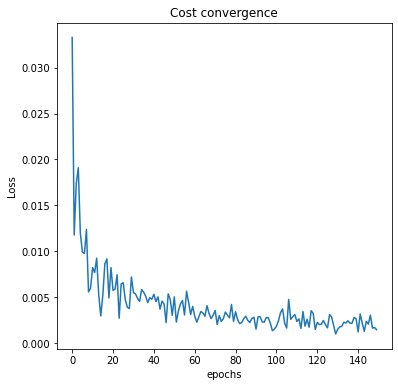

In [4]:
plt.figure(figsize=(6,6))
plt.plot(loss_history)
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("Cost convergence")
plt.show()

In [5]:
auc = vqocc_circuit.auc_test(vector_test_pos,vector_test_neg)
print(auc)

0.8602777777777778


In [6]:
#initialize vqocc circuit
vqocc_circuit = VQOCC.VQOCC_circuit(nqubits=nqubits,ntrash=2,layers=4)

center = vqocc_circuit.center_init_guess(vector_train)

#vqocc_circuit.circuit_train_qsvdd(vector_train,center,lr=0.1,nepochs=150,batch_size=10) #without loss history

#QSVDD training
loss_history = vqocc_circuit.circuit_train_qsvdd(vector_train,center,lr=0.1,nepochs=150,batch_size=10,verbose_loss=True)

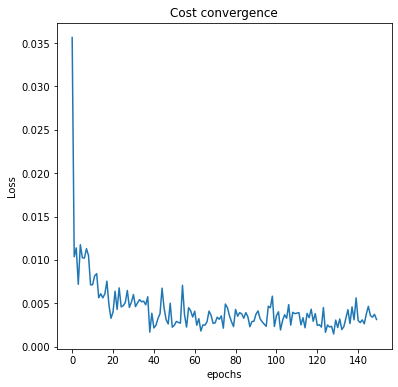

In [7]:
plt.figure(figsize=(6,6))
plt.plot(loss_history)
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("Cost convergence")
plt.show()

In [8]:
auc = vqocc_circuit.auc_test(vector_test_pos,vector_test_neg)
print(auc)

0.8344111111111112


In [9]:
#initialize vqocc circuit
vqocc_circuit = VQOCC.VQOCC_circuit(nqubits=nqubits,ntrash=2,layers=4)

#circuit training
#vqocc_circuit.circuit_train_vqocc(vector_train,lr=0.1,nepochs=150,batch_size=10) #without loss_history

loss_history = vqocc_circuit.circuit_train_vqocc(vector_train,lr=0.1,nepochs=150,batch_size=10,verbose_loss=True)

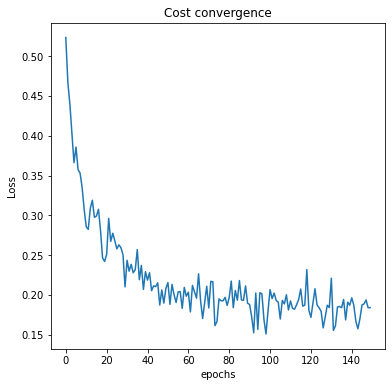

In [10]:
plt.figure(figsize=(6,6))
plt.plot(loss_history)
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("Cost convergence")
plt.show()

In [11]:
auc = vqocc_circuit.auc_test(vector_test_pos,vector_test_neg)
print(auc)

0.8889333333333334
